In [1]:
#preprocessing the dataset,load the file,dropping 2 column,dropping the missing value
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from numpy import where
df = pd.read_csv (r'C:\Users\USER\Desktop\masters\kaggle_cervical_dataset.csv')  
df.drop(["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"], axis = 1, inplace = True)
print(df)
df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
print (df)

     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                        ?   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0          

In [2]:
#combining the 4 target values to single column named final target and then balancing the data using borderlinesmote..
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
df['final target']= df['Hinselmann'] | df['Schiller'] | df['Citology'] | df['Biopsy']
print (df)
X=df.iloc[:,0:30]
y= df.iloc[:,34]
counter = Counter(y)
print(counter)
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

     Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                      15.0   
1     15                        1.0                      14.0   
3     52                        5.0                      16.0   
4     46                        3.0                      21.0   
5     42                        3.0                      23.0   
..   ...                        ...                       ...   
853   34                        3.0                      18.0   
854   32                        2.0                      19.0   
855   25                        2.0                      17.0   
856   33                        2.0                      24.0   
857   29                        2.0                      20.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0             0.0                  0.0   
3  

In [3]:
#Select 10 best feature using Chi2 method
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif
X=df.iloc[:,0:30]
y= df.iloc[:,34]
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
selection = SelectKBest(score_func=chi2, k=10).fit(X, y)
x_new=selection.transform(X)
#print(x_new)
dfscores = pd.DataFrame(selection.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))
model = RandomForestClassifier(random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
accuracy = cross_val_score(model, x_new, y, scoring='accuracy', cv = cv)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

                                 Specs       Score
8      Hormonal Contraceptives (years)  120.242090
10                         IUD (years)   31.053018
6                  Smokes (packs/year)   26.231825
12                       STDs (number)   20.679280
16  STDs:vulvo-perineal condylomatosis   11.723091
13                 STDs:condylomatosis   10.839332
9                                  IUD    8.805981
0                                  Age    7.577671
5                       Smokes (years)    7.291701
11                                STDs    7.112682
Accuracy of Model with Cross Validation is: 81.72929560860595


In [58]:
#select 10 best features using RFE model
from sklearn.pipeline import FeatureUnion, Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from numpy import mean
from numpy import std
#rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
X=df.iloc[:,0:30]
y= df.iloc[:,34]
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
cols = list(X.columns)
model = RandomForestClassifier()
rfe = RFE(model, 10)
X_rfe = rfe.fit_transform(X,y)
model.fit(X_rfe,y) 
print(rfe.support_)
print(rfe.ranking_)

temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)


cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_rfe, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('%.3f (%.3f)' % (mean(scores), std(scores)))


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[ True  True  True  True False  True  True  True  True False  True False
  True False False False False False False False False False False False
 False False False False False False]
[ 1  1  1  1  4  1  1  1  1  2  1  3  1  5 21 14  6 11 19 13 16 20  9 18
 17  8  7 15 10 12]
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)',
       'IUD (years)', 'STDs (number)'],
      dtype='object')
0.930 (0.044)


[0.13667134 0.12320387 0.12514688 0.10750081 0.02986072 0.02626332
 0.02680289 0.1154788  0.11682059 0.04913036 0.03433241 0.01826077
 0.01768994 0.01706795 0.         0.00266381 0.01216358 0.00626536
 0.00020177 0.00527017 0.00025901 0.         0.0082602  0.00039182
 0.00060624 0.00801854 0.00450369 0.00059809 0.00419865 0.00236843]


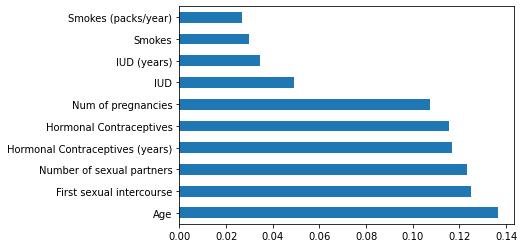

In [54]:
#select 10 best features using ExtraTreesClassifier model
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X=df.iloc[:,0:30]
y= df.iloc[:,34]
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


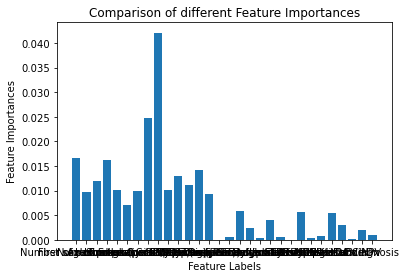

In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import ExtraTreesClassifier 
X=df.iloc[:,0:30]
y= df.iloc[:,34]
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# Building the model 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, 
										criterion ='entropy', max_features = 2) 

# Training the model 
extra_tree_forest.fit(X, y) 

# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 

# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
										extra_tree_forest.estimators_], 
										axis = 0) 
# Plotting a Bar Graph to compare the models 
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 



Feature ranking:
1. feature 0 (0.134082)
2. feature 1 (0.131963)
3. feature 2 (0.123380)
4. feature 7 (0.115748)
5. feature 8 (0.112172)
6. feature 3 (0.111933)
7. feature 9 (0.040135)
8. feature 4 (0.036862)
9. feature 5 (0.028545)
10. feature 10 (0.027839)
11. feature 6 (0.025855)
12. feature 11 (0.020444)
13. feature 12 (0.016275)
14. feature 16 (0.015874)
15. feature 13 (0.012883)
16. feature 25 (0.010088)
17. feature 22 (0.007895)
18. feature 17 (0.007031)
19. feature 28 (0.005422)
20. feature 26 (0.004672)
21. feature 19 (0.003823)
22. feature 29 (0.002576)
23. feature 15 (0.002426)
24. feature 27 (0.000764)
25. feature 24 (0.000576)
26. feature 20 (0.000307)
27. feature 23 (0.000281)
28. feature 18 (0.000147)
29. feature 21 (0.000000)
30. feature 14 (0.000000)


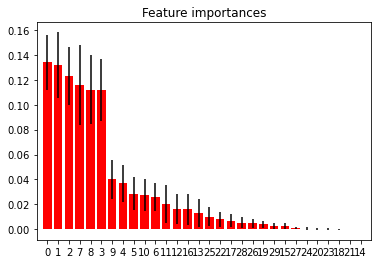

In [52]:
X=df.iloc[:,0:30]
y= df.iloc[:,34]
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

>3 0.934 (0.039)
>4 0.934 (0.038)
>5 0.934 (0.041)
>6 0.933 (0.041)
>7 0.934 (0.038)
>8 0.934 (0.040)
>9 0.931 (0.042)
>10 0.933 (0.039)
>11 0.935 (0.038)
>12 0.935 (0.038)
>13 0.932 (0.041)
>14 0.934 (0.042)
>15 0.930 (0.041)
>16 0.929 (0.042)
>17 0.932 (0.040)
>18 0.930 (0.041)
>19 0.930 (0.040)
>20 0.931 (0.040)
>21 0.930 (0.044)
>22 0.928 (0.039)
>23 0.927 (0.040)
>24 0.929 (0.042)
>25 0.930 (0.041)
>26 0.928 (0.041)
>27 0.928 (0.042)
>28 0.926 (0.041)
>29 0.927 (0.041)


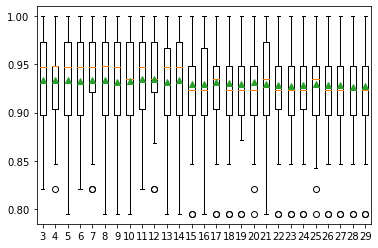

In [55]:
# explore extra trees number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
X=df.iloc[:,0:30]
y= df.iloc[:,34]
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 3 to 30
	for i in range(3, 30):
		models[str(i)] = ExtraTreesClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()